Mohammadreza Mohammadzadeh Asl
Student ID: 98243097

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def convert_to_nx_format(adj_d):
    ret = []
    for v in adj_d:
        for u in adj_d[v]:
            ret.append((v,u))
    return ret

def convert_path_to_edge_list(p):
    if len(p) < 2:
        return []
    ret = []
    last = p[0]
    for i in range(1,len(p)):
        ret.append((last, p[i]))
        last=p[i]
    return ret

def show_graph(nodes, e1, e2= {}):
    e1x=convert_to_nx_format(e1)
    e2x= convert_to_nx_format(e2)
    difd = []
    for x in e1x:
        if not x in e2x:
            difd.append(x)
    
    g = nx.DiGraph()
    g.add_nodes_from(nodes, c='red')
    g.add_edges_from(difd ,color='green')
    g.add_edges_from(e1x ,color='blue')
    nx.draw_planar(g, with_labels = True )

def show_path(file_counter, nodes, e1, e2= {}):
    #e1x=convert_to_nx_format(e1)
    #e2x= convert_to_nx_format(e2)
    #difd = []
    #for x in e1x:
    #    if not x in e2x:
    #        difd.append(x)
    #
    g = nx.DiGraph()
    g.add_nodes_from(nodes, c='red')
    g.add_edges_from(e1 ,color='green')
    #g.add_edges_from(e1x ,color='blue')
    nx.draw_planar(g, with_labels = True )
    plt.savefig("path"+str(file_counter)+".png")
    #file_counter = file_counter+1
    plt.clf()


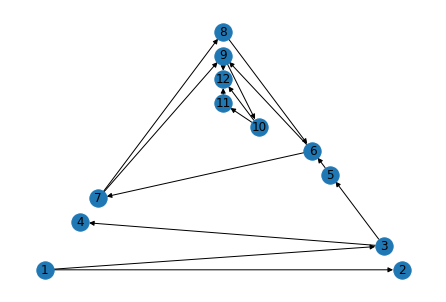

In [2]:
adj = {} #dictionary of dictionaries. the ith key gives node i neighbors. 
nodes = []
def read_input():
    inp = input().split()
    n,m = int(inp[0]), int(inp[1])

    nodes = list(range(1,n+1))
    def input_nodes():
        nodes= []
        inp = input().split()
        for i in inp:
            nodes.append(int(i))

    for i in range(m):
        inp = input().split()
        v,u = int(inp[0]), int(inp[1])
        if v in adj:
            adj[v].append(u)
        else:
            adj[v]=[u]

#read_input() #{1: [2, 3, 5], 2: [3], 3: [4], 4: [5]}
#adj = {1: [2, 3, 5], 2: [3], 3: [4], 4: [5]}
#n,m = 5,6

n,m = 12,15
adj = {1: [2, 3],3: [4, 5],5: [6],6: [7, 9],7: [8, 9],8: [6],9: [10, 12],10: [11, 12],11: [12],}

#n,m=12,5
#adj = {6: [7, 9],7: [8, 9],8: [6], 9:[10]}

nodes = list(range(1,n+1))
show_graph(nodes, adj)

In [3]:
print(adj)

{1: [2, 3], 3: [4, 5], 5: [6], 6: [7, 9], 7: [8, 9], 8: [6], 9: [10, 12], 10: [11, 12], 11: [12]}


In [4]:
class Path:
    def __init__(self, path=None):
        if path == None:
            self.order = []
            self.isInPath = {}
            self.blocked = False
            return
        self.order = path.order.copy()
        self.isInPath = path.isInPath.copy()
        self.blocked = path.blocked

    def __len__(self):
        return len(self.order)
    
    def add_to_end(self, node):
        self.order.append(node)
        if node in self.isInPath:
            self.blocked = True
            return
        self.isInPath[node] = True
        self.update_blocked()
    
    def can_add(self, node):
        if self.blocked:
            return False
        if not node in self.isInPath:
            return True
        elif self.order[0] == node:
            return True
        return False

    def update_blocked(self):
        if self.order[-1] not in adj:
            self.blocked = True
            return
        for nei in adj[self.order[-1]]:
            if self.can_add(nei):
                return
        self.blocked = True

    def one_step(self):
        if self.blocked:
            return None
        retList = []
        for nei in adj[self.order[-1]]:
            if self.can_add(nei):
                new_path = Path(self)
                new_path.add_to_end(nei)
                retList.append(new_path)
        return retList

    def __str__(self):
        return str(self.order)


In [5]:
class Prime_paths:
    def __init__(self):
        self.paths = [] #list of lists of Path. the ith element gives path with length i
        self.cur_length = 0 #length of maximum path

    def find_all_paths(self):
        self.paths= []
        self.paths.append([])
        for i in nodes:
            path= Path()
            path.add_to_end(i)
            self.paths[0].append(path)
        found = True
        self.cur_length = 0

        while found:
            found = False
            self.cur_length = self.cur_length + 1
            self.paths.append([])
            for path in self.paths[self.cur_length-1]:
                res = path.one_step()
                if res != None:
                    found = True
                    self.paths[self.cur_length].extend(res)
            if not found:
                self.paths.pop()
                self.cur_length = self.cur_length - 1
                
    def print_paths_of_len(self,x):
        if x >= len(self.paths):
            return
        for i in self.paths[x]:
            print(i)

    def print_all_paths(self):
        for i in range(self.cur_length+1):
            self.print_paths_of_len(i)

    def is_in_path(self,p,q):
        dif = len(p)-len(q)
        for i in range(dif+1):
            flag = True
            for j in range(len(q)):
                if p.order[i+j] != q.order[j]:
                    flag = False
                    break
            if flag:
                return True
        return False

    def find_prime_paths(self):
        i = self.cur_length
        prime_paths = []
        while i >=0:
            for j in self.paths[i]:
                if not j.blocked:
                    continue
                flag = True
                for pp in prime_paths:
                    if self.is_in_path(pp, j):
                        flag = False
                        break
                if flag:
                    prime_paths.append(j)
            i = i-1
        for x in prime_paths:
            print(x)
        return prime_paths

In [6]:
pp = Prime_paths()
pp.find_all_paths()
pp_data = pp.find_prime_paths()

[1, 3, 5, 6, 7, 9, 10, 11, 12]
[1, 3, 5, 6, 7, 9, 10, 12]
[1, 3, 5, 6, 9, 10, 11, 12]
[1, 3, 5, 6, 7, 9, 12]
[1, 3, 5, 6, 9, 10, 12]
[7, 8, 6, 9, 10, 11, 12]
[8, 6, 7, 9, 10, 11, 12]
[1, 3, 5, 6, 7, 8]
[1, 3, 5, 6, 9, 12]
[7, 8, 6, 9, 10, 12]
[8, 6, 7, 9, 10, 12]
[7, 8, 6, 9, 12]
[8, 6, 7, 9, 12]
[6, 7, 8, 6]
[7, 8, 6, 7]
[8, 6, 7, 8]
[1, 3, 4]
[1, 2]


In [9]:
file_counter=0 #for file suffix
for i in pp_data:
    show_path(file_counter, nodes, convert_path_to_edge_list(i.order))
    file_counter = file_counter+1

<Figure size 432x288 with 0 Axes>